In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_csv('C:/Users/Thiago/Desktop/Potifolio/Projeto calculadora de imoveis/Data Sets/Model_input.csv')

In [3]:
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem"]]
y = df["preço"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [5]:
X.shape

(6592, 5)

In [6]:
X_train.shape

(5273, 5)

In [7]:
X_test.shape

(1319, 5)

In [8]:
y_train

1439     6799.0
3615     2600.0
6404     9500.0
4635     8900.0
4341     4500.0
         ...   
3497     2670.0
3492     1600.0
2177     4000.0
3557     1500.0
4578    14500.0
Name: preço, Length: 5273, dtype: float64

In [9]:
model = LinearRegression(fit_intercept=False)

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [11]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [12]:
np.mean(np.abs(y_train - y_pred_train)/y_train)

0.44974581038325884

In [13]:
np.mean(np.abs(y_test - y_pred_test)/y_test)

0.41080964188347274

In [14]:
r2_score(y_test, y_pred_test)

0.7200846687580622

# KNN

In [15]:
knn = KNeighborsRegressor(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
def mape(y_test, y_pred):
    return np.mean(np.abs((y_test-y_pred)/y_test))

In [19]:
mape(y_test,y_pred)

0.38855783839940833

In [20]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.4330189788358114
k=3, mape=0.39267123797793474
k=5, mape=0.38855783839940833
k=7, mape=0.3826335395447818
k=9, mape=0.37815115401639443


In [21]:
scaler = MinMaxScaler()

In [22]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [24]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.4385753069608717
k=3, mape=0.40724304583843124
k=5, mape=0.3945713252339311
k=7, mape=0.38907837675492674
k=9, mape=0.38410142253458934


In [25]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [26]:
novo_apto = pd.DataFrame([[60, 4, 2, 500, 1]], columns=X_train.columns)

In [27]:
novo_apto_scaled = scaler.transform(novo_apto)

In [28]:
knn.predict(novo_apto_scaled)

array([2233.33333333])

In [29]:
residuals = y_test - y_pred

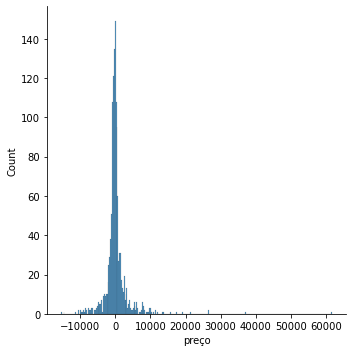

In [30]:
sns.displot(residuals)

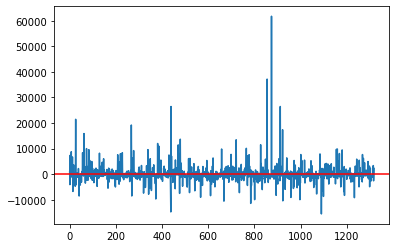

In [31]:
residuals_df = pd.DataFrame(residuals).reset_index(drop=True)
residuals_df["preço"].plot()
plt.axhline(y=0, c="r")

In [32]:
r2_score(y_test, y_pred)

0.6988991762971744

# Com Bairro

In [33]:
df = pd.read_csv('C:/Users/Thiago/Desktop/Potifolio/Projeto calculadora de imoveis/Data Sets/Model_input_with_crawlers.csv')
X = df[["area_limpo", "Banheiro", "Quarto", "condominio", "Garagem", "crawler"]]
y = df["preço"]

In [34]:
X = pd.concat((X,pd.get_dummies(X["crawler"])), axis=1).drop(columns=["crawler"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=12345, shuffle=True)

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mape(y_test, y_pred)

0.4034407642490305

106.64835751902443

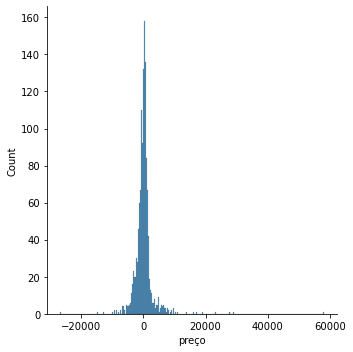

In [37]:
residuals = y_test - y_pred
sns.displot(residuals)
np.mean(residuals)

In [38]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.20, random_state=12345, shuffle=True)

In [40]:
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mape(y_test, y_pred)
    print(f"k={k}, mape={error}")

k=1, mape=0.31785174729352367
k=3, mape=0.2756615704629679
k=5, mape=0.26992140054688146
k=7, mape=0.2698043932397728
k=9, mape=0.2648886486802932


In [41]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
error = mape(y_test, y_pred)
residuals = y_test - y_pred

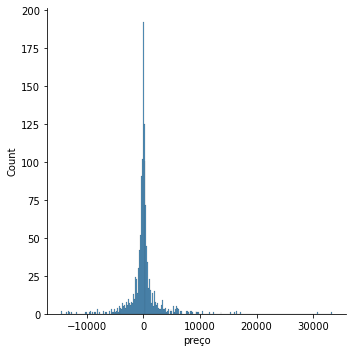

In [42]:
sns.displot(residuals)

In [43]:
r2_score(y_test, y_pred)

0.8000401629719616

In [44]:
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mape(y_test, y_pred)

0.4476574491662741

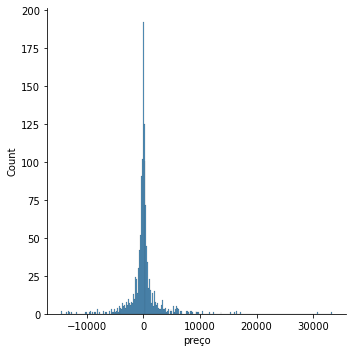

In [45]:
sns.displot(residuals)

In [46]:
r2_score(y_test, y_pred)

0.7027436667542006

In [47]:
cat= CatBoostRegressor()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
mape(y_test, y_pred)

Learning rate set to 0.052472
0:	learn: 5968.2090669	total: 353ms	remaining: 5m 52s
1:	learn: 5782.9266569	total: 365ms	remaining: 3m 2s
2:	learn: 5600.0156007	total: 378ms	remaining: 2m 5s
3:	learn: 5425.1008801	total: 389ms	remaining: 1m 36s
4:	learn: 5274.1435216	total: 392ms	remaining: 1m 18s
5:	learn: 5134.7368281	total: 397ms	remaining: 1m 5s
6:	learn: 4998.0097695	total: 400ms	remaining: 56.8s
7:	learn: 4869.9131635	total: 404ms	remaining: 50s
8:	learn: 4742.6454027	total: 407ms	remaining: 44.8s
9:	learn: 4623.2584694	total: 410ms	remaining: 40.6s
10:	learn: 4506.9799591	total: 413ms	remaining: 37.1s
11:	learn: 4398.7854789	total: 416ms	remaining: 34.3s
12:	learn: 4292.3126541	total: 420ms	remaining: 31.9s
13:	learn: 4189.7316634	total: 423ms	remaining: 29.8s
14:	learn: 4103.9681539	total: 426ms	remaining: 28s
15:	learn: 4017.5360423	total: 429ms	remaining: 26.4s
16:	learn: 3930.2884016	total: 433ms	remaining: 25s
17:	learn: 3856.2958858	total: 436ms	remaining: 23.8s
18:	learn: 

0.24196825704469488

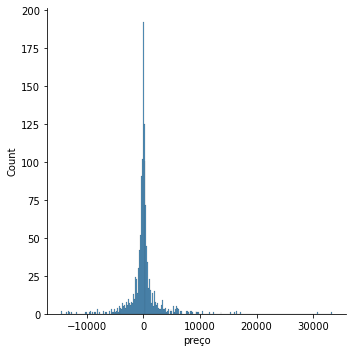

In [48]:
sns.displot(residuals)

In [49]:
r2_score(y_test, y_pred)

0.8707318304606855